### Alice creates her key, encodes it with her bases, and tries to send it to Bob

In [39]:
from random import choices
import cirq

num_bits = 20

encode_gates = {0: cirq.I, 1: cirq.X} # Gates that produce the 0 and 1 quantums states, which represents the keys
basis_gates = {"Z": cirq.I, "X": cirq.H} # Gates that will create the correct qubit encryption

message = "Quantum Computing"

alice_key = choices([0, 1], k = num_bits)
print("Alice Key: ", alice_key)
alice_bases = choices(['Z', 'X'], k = num_bits)
print("Alice Bases: ", alice_bases)

alice_circuit = cirq.Circuit()
qubits = cirq.NamedQubit.range(num_bits, prefix = 'q')

for bit in range(num_bits):

 encode_value = alice_key[bit]
 encode_gate = encode_gates[encode_value]

 basis_value = alice_bases[bit]
 basis_gate = basis_gates[basis_value]

 qubit = qubits[bit]
 alice_circuit.append(encode_gate(qubit))
 alice_circuit.append(basis_gate(qubit))



Alice Key:  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0]
Alice Bases:  ['X', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X']


### But... it is intercepted by Eve.
#### Three different attacks that Even can use:
1. Measurement attack

### The measurement attack:
* Eve recieves Alice's qubits and measures all of them. Using the measurements, she infers the states of Alice's qubits, and sends her guesses over to Bob. In my scenario, Eve will simply send her measurements over to Bob. However, half of these guesses will be wrong because of the probabilitic nature of qubits in superposition. Thus, Bob will easily be able to detect a measurement attack.

In [40]:
eve_circuit = cirq.Circuit()
eve_circuit.append(cirq.measure(qubits, key="eve intercept"))# COMPLETE THIS CODE
eve_circuit

q0: ────M('eve intercept')───
        │
q1: ────M────────────────────
        │
q2: ────M────────────────────
        │
q3: ────M────────────────────
        │
q4: ────M────────────────────
        │
q5: ────M────────────────────
        │
q6: ────M────────────────────
        │
q7: ────M────────────────────
        │
q8: ────M────────────────────
        │
q9: ────M────────────────────
        │
q10: ───M────────────────────
        │
q11: ───M────────────────────
        │
q12: ───M────────────────────
        │
q13: ───M────────────────────
        │
q14: ───M────────────────────
        │
q15: ───M────────────────────
        │
q16: ───M────────────────────
        │
q17: ───M────────────────────
        │
q18: ───M────────────────────
        │
q19: ───M────────────────────

In [41]:
eve_intercept_circuit = alice_circuit + eve_circuit

sim = cirq.Simulator()
results = sim.run(eve_intercept_circuit)
eve_key = results.measurements['eve intercept'][0]

print(eve_intercept_circuit)

print('\nEve\'s initial key: ', eve_key)

q0: ────I───H───M('eve intercept')───
                │
q1: ────I───H───M────────────────────
                │
q2: ────X───I───M────────────────────
                │
q3: ────X───I───M────────────────────
                │
q4: ────X───I───M────────────────────
                │
q5: ────X───I───M────────────────────
                │
q6: ────X───I───M────────────────────
                │
q7: ────I───I───M────────────────────
                │
q8: ────I───H───M────────────────────
                │
q9: ────I───I───M────────────────────
                │
q10: ───I───H───M────────────────────
                │
q11: ───X───I───M────────────────────
                │
q12: ───I───H───M────────────────────
                │
q13: ───X───I───M────────────────────
                │
q14: ───X───I───M────────────────────
                │
q15: ───I───H───M────────────────────
                │
q16: ───X───H───M────────────────────
                │
q17: ───X───I───M────────────────────
          

* **Eve then sends the zeros and ones to Bob** (no code necessary)
* **Bob does his normal procedure to decrypt the qubits**

In [42]:
bob_bases = choices(["Z", "X"], k=num_bits)# COMPLETE THIS CODE


bob_circuit = cirq.Circuit()

for bit in range(num_bits):# COMPLETE THIS CODE

  basis_value = bob_bases[bit]# COMPLETE THIS CODE
  basis_gate = basis_gates[basis_value]# COMPLETE THIS CODE

  qubit = qubits[bit]# COMPLETE THIS CODE
  bob_circuit.append(basis_gate(qubit))# COMPLETE THIS CODE

bob_circuit.append(cirq.measure(qubits, key="bob key"))# COMPLETE THIS CODE

print(bob_circuit)

q0: ────H───M('bob key')───
            │
q1: ────H───M──────────────
            │
q2: ────H───M──────────────
            │
q3: ────I───M──────────────
            │
q4: ────I───M──────────────
            │
q5: ────H───M──────────────
            │
q6: ────H───M──────────────
            │
q7: ────H───M──────────────
            │
q8: ────I───M──────────────
            │
q9: ────H───M──────────────
            │
q10: ───H───M──────────────
            │
q11: ───I───M──────────────
            │
q12: ───I───M──────────────
            │
q13: ───H───M──────────────
            │
q14: ───H───M──────────────
            │
q15: ───I───M──────────────
            │
q16: ───H───M──────────────
            │
q17: ───I───M──────────────
            │
q18: ───H───M──────────────
            │
q19: ───H───M──────────────


* **The only caveat is, during measurement, we need to include the effects of Eve's measurement attack**

In [43]:
bb84_circuit = alice_circuit + eve_intercept_circuit + bob_circuit
print(bb84_circuit)

q0: ────I───H───I───H───M('eve intercept')───H───M('bob key')───
                        │                        │
q1: ────I───H───I───H───M────────────────────H───M──────────────
                        │                        │
q2: ────X───I───X───I───M────────────────────H───M──────────────
                        │                        │
q3: ────X───I───X───I───M────────────────────I───M──────────────
                        │                        │
q4: ────X───I───X───I───M────────────────────I───M──────────────
                        │                        │
q5: ────X───I───X───I───M────────────────────H───M──────────────
                        │                        │
q6: ────X───I───X───I───M────────────────────H───M──────────────
                        │                        │
q7: ────I───I───I───I───M────────────────────H───M──────────────
                        │                        │
q8: ────I───H───I───H───M────────────────────I───M──────────────
       

* **Create a shared final key. This final key should not match**

In [44]:

final_alice_key = []
final_bob_key = []

for bit in range(num_bits):
    if alice_bases[bit] == bob_bases[bit]:
        final_alice_key.append(alice_key[bit])
        final_bob_key.append(bob_key[bit])
print("Final Alice key: ", final_alice_key)
print("Final Bob key: ", final_bob_key)

IndexError: index 10 is out of bounds for axis 0 with size 10

* **Statistically, Alice's key and Bob's key should only match 50%-ish**

In [ ]:
total_agree = 0

for i in range(len(final_bob_key)):
    if final_bob_key[i]==final_alice_key[i]:
        total_agree += 1

print("Percentage of Alice's final key that matches with Bob's final key: ", (total_agree/len(final_alice_key)))
    

Percentage of Alice's final key that matches with Bob's final key:  0.4


### Simulate the QKD circuit 50 times to see the average effects of the eavesdropper

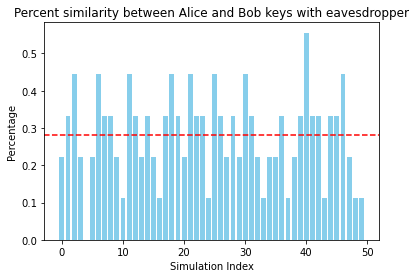

In [45]:
def simulate():
    '''
    Create Bob's key
    '''
    sim = cirq.Simulator()
    results = sim.run(bb84_circuit)
    bob_key = results.measurements['bob key'][0]
    
    '''
    Create final shared keys
    '''
    final_alice_key = []
    final_bob_key = []

    for bit in range(num_bits):
        if alice_bases[bit] == bob_bases[bit]:
            final_alice_key.append(alice_key[bit])
            final_bob_key.append(bob_key[bit])

    '''
    Create the percentage of same elements in Alice and Bob's respective keys
    '''    
    total_agree = 0
    for i in range(len(final_bob_key)):
        if final_bob_key[i]==final_alice_key[i]:
            total_agree += 1
    return (total_agree/len(final_alice_key))

num_runs = 50
percentages = []
for i in range(num_runs):
    percentages.append(simulate())

import matplotlib.pyplot as plt

def bar_chart(percentage_list):
    # Define the x-axis values as indices of the list
    x_values = range(len(percentage_list))
    average_percentage = sum(percentage_list) / len(percentage_list)
    # Create a bar chart
    plt.bar(x_values, percentage_list, color='skyblue')
    
    # Add labels and title
    plt.xlabel('Simulation Index')
    plt.ylabel('Percentage')
    plt.title('Percent similarity between Alice and Bob keys with eavesdropper')
    
    plt.axhline(y=average_percentage, color='red', linestyle='--', label=f'Average: {average_percentage*100:.1f}%')
    # Show plot
    plt.show()

bar_chart(percentages)